# Step 1: Data Collection

In [77]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [78]:
# Rainfall data in pukekohe
rain = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Rain__H.csv', index_col='Observation time UTC', parse_dates=True)

# # smheadtail = (np.r_[0:5, -5:0])
# rainheadtail = rain.iloc[np.r_[0:5, -5:0]]
print(rain)

                           Rainfall [mm]
Observation time UTC                    
2010-02-24 23:00:00+00:00            0.8
2021-09-02 12:00:00+00:00            0.0
2021-08-31 08:00:00+00:00            0.0
2013-05-07 22:00:00+00:00            0.0
2013-05-16 13:00:00+00:00            0.0
...                                  ...
2024-10-07 06:00:00+00:00            0.0
2024-06-15 16:00:00+00:00            0.0
2024-06-17 10:00:00+00:00            0.0
2024-03-15 15:00:00+00:00            0.0
2024-03-15 17:00:00+00:00            0.0

[238008 rows x 1 columns]


In [79]:
# Soil Temperature data at 10cm in pukekohe
et10 = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Earth_Temperature__H_10cm.csv', index_col='Observation time UTC', parse_dates=True)
print(et10)

                           SoilTemp10cm
Observation time UTC                   
2006-08-11 22:00:00+00:00           9.2
2006-08-11 23:00:00+00:00          10.1
2006-08-12 00:00:00+00:00          10.9
2006-08-12 01:00:00+00:00          11.7
2006-08-12 02:00:00+00:00          12.2
...                                 ...
2024-08-14 05:00:00+00:00          13.0
2024-09-25 10:00:00+00:00          14.5
2024-10-01 11:00:00+00:00          14.6
2024-07-23 16:00:00+00:00          10.6
2024-08-05 02:00:00+00:00          12.1

[240593 rows x 1 columns]


In [97]:
# Soil Temperature data at 20cm in pukekohe
et20 = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Earth_Temperature__H_20cm.csv', index_col='Observation time UTC', parse_dates=True)
print(et20)

                           SoilTemp20cm
Observation time UTC                   
2006-08-11 22:00:00+00:00           9.9
2006-08-11 23:00:00+00:00           9.9
2006-08-12 00:00:00+00:00          10.0
2006-08-12 01:00:00+00:00          10.2
2006-08-12 02:00:00+00:00          10.3
...                                 ...
2024-08-14 05:00:00+00:00          11.7
2024-09-25 10:00:00+00:00          15.0
2024-10-01 11:00:00+00:00          14.9
2024-07-23 16:00:00+00:00          11.9
2024-08-05 02:00:00+00:00          11.0

[243021 rows x 1 columns]


In [98]:
# Soil Temperature data at 50cm in pukekohe
et50 = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Earth_Temperature__H_50cm.csv', index_col='Observation time UTC', parse_dates=True)
print(et50)

                           SoilTemp50cm
Observation time UTC                   
1999-01-12 06:00:00+00:00          22.0
1999-01-12 07:00:00+00:00          21.9
1999-01-12 08:00:00+00:00          22.0
1999-01-12 09:00:00+00:00          21.9
1999-01-12 10:00:00+00:00          22.0
...                                 ...
2024-08-14 05:00:00+00:00          12.2
2024-09-25 10:00:00+00:00          14.3
2024-10-01 11:00:00+00:00          14.4
2024-07-23 16:00:00+00:00          12.8
2024-08-05 02:00:00+00:00          12.5

[203172 rows x 1 columns]


In [99]:
# Soil Temperature data at 100cm in pukekohe
et100 = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Earth_Temperature__H_100cm.csv', index_col='Observation time UTC', parse_dates=True)
print(et100)

                           SoilTemp100cm
Observation time UTC                    
2006-08-11 22:00:00+00:00           12.7
2006-08-11 23:00:00+00:00           12.7
2006-08-12 00:00:00+00:00           12.7
2006-08-12 01:00:00+00:00           12.7
2006-08-12 02:00:00+00:00           12.7
...                                  ...
2024-08-14 05:00:00+00:00           13.4
2024-09-25 10:00:00+00:00           14.2
2024-10-01 11:00:00+00:00           14.4
2024-07-23 16:00:00+00:00           13.8
2024-08-05 02:00:00+00:00           13.7

[242517 rows x 1 columns]


In [107]:
# Combine Earth Temperature datasets on the timestamp
et = et10.join(et20, how='inner', rsuffix='_20cm')
et = et.join(et50, how='inner', rsuffix='_50cm')
et = et.join(et100, how='inner', rsuffix='_100cm')
et.dropna(inplace=True)  # Drop any rows with missing values after merging
et.info()
print(et)
# et.to_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/SoilTemperature_Pukekohe.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198512 entries, 1999-01-12 06:00:00+00:00 to 2024-08-05 02:00:00+00:00
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SoilTemp10cm   198512 non-null  float64
 1   SoilTemp20cm   198512 non-null  float64
 2   SoilTemp50cm   198512 non-null  float64
 3   SoilTemp100cm  198512 non-null  float64
dtypes: float64(4)
memory usage: 7.6 MB
                           SoilTemp10cm  SoilTemp20cm  SoilTemp50cm  \
Observation time UTC                                                  
1999-01-12 06:00:00+00:00          26.2          24.0          22.0   
1999-01-12 07:00:00+00:00          25.8          24.1          21.9   
1999-01-12 08:00:00+00:00          25.4          24.1          22.0   
1999-01-12 09:00:00+00:00          24.9          24.1          21.9   
1999-01-12 10:00:00+00:00          24.5          23.9          22.0   
...                                 .

In [103]:
# Soil Moisture data in pukekohe
sm = pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Soil_Moisture__H_20cm.csv', index_col='Observation time UTC', parse_dates=True)
print(sm)

                           Soil moisture [percent]
Observation time UTC                              
2000-07-09 12:00:00+00:00                     39.0
2000-07-09 13:00:00+00:00                     39.1
2000-07-09 22:00:00+00:00                     39.1
2000-07-09 23:00:00+00:00                     39.3
2000-07-10 00:00:00+00:00                     39.0
...                                            ...
2024-09-17 08:00:00+00:00                     52.7
2024-07-10 03:00:00+00:00                     46.6
2024-07-10 15:00:00+00:00                     46.4
2024-07-11 16:00:00+00:00                     46.0
2024-07-12 07:00:00+00:00                     45.7

[206805 rows x 1 columns]


In [104]:
# Evaporation data in pukekohe
eva =  pd.read_csv('../Data/NIWA/2006_Soil_Moisture_PUKEKOHE EWS/2006__Evaporation__Penman-PET__D.csv', index_col='Observation time UTC', parse_dates=True)

# Resample daily data to hourly data and fill with the same day's value
eva_hourly = eva.resample('H').ffill()

# Display the resampled hourly data
print("\nResampled Hourly Data with Same Day's Value:")
print(eva_hourly)


Resampled Hourly Data with Same Day's Value:
                           Evaporation [mm]
Observation time UTC                       
1986-03-05 21:00:00+00:00               4.2
1986-03-05 22:00:00+00:00               4.2
1986-03-05 23:00:00+00:00               4.2
1986-03-06 00:00:00+00:00               4.2
1986-03-06 01:00:00+00:00               4.2
...                                     ...
2024-10-02 16:00:00+00:00               2.1
2024-10-02 17:00:00+00:00               2.1
2024-10-02 18:00:00+00:00               2.1
2024-10-02 19:00:00+00:00               2.1
2024-10-02 20:00:00+00:00               1.9

[338184 rows x 1 columns]


C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\2285488696.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  eva_hourly = eva.resample('H').ffill()


# Step 2: Merge Data

In [105]:
# Resampling to hourly frequency and forward filling values (fill with the same day's value)
rain_hourly = rain.resample('H').ffill()  
et_hourly = et.resample('H').ffill()
eva_hourly = eva_hourly.resample('H').ffill()
sm_hourly = sm.resample('H').ffill()

pukekohe = pd.merge(rain_hourly, et_hourly, how='inner', on='Observation time UTC')
pukekohe = pd.merge(pukekohe, eva_hourly, how='inner', on='Observation time UTC')
pukekohe = pd.merge(pukekohe, sm_hourly, how='inner', on='Observation time UTC')

# drop rows with all NaN values
pukekohe.dropna(how='any', inplace=True)
pukekohe.head()

C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\2844755530.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rain_hourly = rain.resample('H').ffill()
C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\2844755530.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  et_hourly = et.resample('H').ffill()


C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\2844755530.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  eva_hourly = eva_hourly.resample('H').ffill()
C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\2844755530.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sm_hourly = sm.resample('H').ffill()


,Rainfall [mm],SoilTemp10cm,SoilTemp20cm,SoilTemp50cm,SoilTemp100cm,Evaporation [mm],Soil moisture [percent]
Observation time UTC,,,,,,,
2000-07-04 04:00:00+00:00,2.6,14.6,14.6,16.2,20.5,3.2,40.9
2000-07-04 05:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5
2000-07-04 06:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5
2000-07-04 07:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.1
2000-07-04 08:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,43.9


In [108]:
print(pukekohe.isna().sum())


Rainfall [mm]              0
SoilTemp10cm               0
SoilTemp20cm               0
SoilTemp50cm               0
SoilTemp100cm              0
Evaporation [mm]           0
Soil moisture [percent]    0
dtype: int64


In [114]:
monthly_mean = pukekohe.resample('M').mean()
print(monthly_mean)

                           Rainfall [mm]  SoilTemp10cm  SoilTemp20cm  \
Observation time UTC                                                   
2000-07-31 00:00:00+00:00       0.163772     14.032036     12.430838   
2000-08-31 00:00:00+00:00       0.174462     12.736425     11.220296   
2000-09-30 00:00:00+00:00       0.121667     12.776806     11.564167   
2000-10-31 00:00:00+00:00       0.112366     16.668548     16.031317   
2000-11-30 00:00:00+00:00       0.175278     17.646528     16.861389   
...                                  ...           ...           ...   
2024-06-30 00:00:00+00:00       0.115278     12.776528     13.288194   
2024-07-31 00:00:00+00:00       0.163172     10.964651     11.415457   
2024-08-31 00:00:00+00:00       0.126882     12.065188     12.229973   
2024-09-30 00:00:00+00:00       0.128056     14.191111     14.259861   
2024-10-31 00:00:00+00:00       0.773333     15.006667     14.864444   

                           SoilTemp50cm  SoilTemp100cm  Evapora

C:\Users\Ying\AppData\Local\Temp\ipykernel_14056\1938575422.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = pukekohe.resample('M').mean()


# Step 3 : Data Description

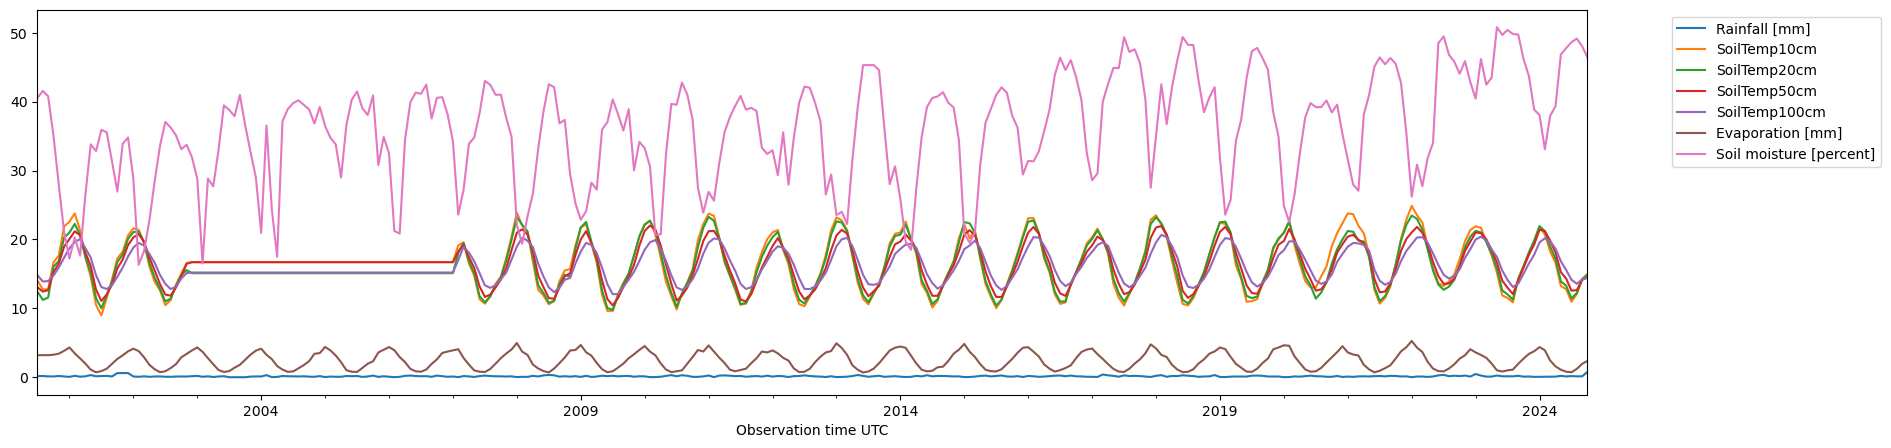

In [145]:
monthly_mean.plot(figsize=(20,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [121]:
nan_rows = monthly_mean[monthly_mean.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Rainfall [mm], SoilTemp10cm, SoilTemp20cm, SoilTemp50cm, SoilTemp100cm, Evaporation [mm], Soil moisture [percent]]
Index: []


In [123]:
# Overview of data
print("Pukekohe Monthly Data statistics :")
monthly_mean.describe()


Pukekohe Monthly Data statistics :


,Rainfall [mm],SoilTemp10cm,SoilTemp20cm,SoilTemp50cm,SoilTemp100cm,Evaporation [mm],Soil moisture [percent]
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.141133,16.546277,16.185826,16.422269,16.173450,2.445841,35.923747
std,0.097471,3.787484,3.584573,3.003873,2.274978,1.251393,7.924887
min,0.000000,8.973253,9.770027,10.428495,12.051478,0.680417,16.320387
25%,0.079368,13.571771,13.484792,13.703681,14.451429,1.214617,30.838194
50%,0.127823,16.700000,15.100000,16.700000,15.200000,2.360143,37.253024
75%,0.182849,19.658972,19.520128,18.857628,18.344422,3.596962,41.050165
max,0.773333,24.860484,23.468952,22.010119,20.659226,5.262903,50.799866


In [124]:
print("\n Pukekohe Daily Data statistics :")
pukekohe.describe()



 Pukekohe Daily Data statistics :


,Rainfall [mm],SoilTemp10cm,SoilTemp20cm,SoilTemp50cm,SoilTemp100cm,Evaporation [mm],Soil moisture [percent]
count,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000,212561.000000
mean,0.139374,16.528990,16.168445,16.409351,16.164850,2.440231,35.936383
std,0.731544,4.318461,3.738577,3.053226,2.302981,1.478113,8.786790
min,0.000000,-2.100000,0.000000,0.000000,-0.200000,0.000000,0.000000
25%,0.000000,13.400000,13.400000,13.800000,14.400000,1.200000,30.600000
50%,0.000000,16.700000,15.100000,16.700000,15.200000,2.200000,37.000000
75%,0.000000,19.200000,19.300000,18.800000,18.300000,3.500000,41.700000
max,46.800000,37.500000,32.900000,40.200000,35.000000,8.200000,60.300000


Data Cleaning


In [125]:
# Display missing value
print("'Missing Value in Data")
pukekohe.isna().sum()


'Missing Value in Soil Moisture Data


Rainfall [mm]              0
SoilTemp10cm               0
SoilTemp20cm               0
SoilTemp50cm               0
SoilTemp100cm              0
Evaporation [mm]           0
Soil moisture [percent]    0
dtype: int64

In [126]:
pukekohe.isnull().sum()

Rainfall [mm]              0
SoilTemp10cm               0
SoilTemp20cm               0
SoilTemp50cm               0
SoilTemp100cm              0
Evaporation [mm]           0
Soil moisture [percent]    0
dtype: int64

In [127]:
mean_pukekohe = pukekohe.mean()
std_pukekohe = pukekohe.std()

# Define thresholds for outliers
lower_threshold = pukekohe - 2 * std_pukekohe
upper_threshold = pukekohe + 2 * std_pukekohe

# Find rows with unusual values
troubling_rows = pukekohe[(pukekohe < lower_threshold) | 
                          (pukekohe > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                           Rainfall [mm]  SoilTemp10cm  SoilTemp20cm  \
Observation time UTC                                                   
2000-07-04 04:00:00+00:00            NaN           NaN           NaN   
2000-07-04 05:00:00+00:00            NaN           NaN           NaN   
2000-07-04 06:00:00+00:00            NaN           NaN           NaN   
2000-07-04 07:00:00+00:00            NaN           NaN           NaN   
2000-07-04 08:00:00+00:00            NaN           NaN           NaN   
...                                  ...           ...           ...   
2024-10-02 16:00:00+00:00            NaN           NaN           NaN   
2024-10-02 17:00:00+00:00            NaN           NaN           NaN   
2024-10-02 18:00:00+00:00            NaN           NaN           NaN   
2024-10-02 19:00:00+00:00            NaN           NaN           NaN   
2024-10-02 20:00:00+00:00            NaN           NaN           NaN   

                           SoilTemp50cm  SoilTemp100cm  Evapora

# Step 4 : Handle Missing Values

In [146]:
pukekohe.columns

Index(['Rainfall [mm]', 'SoilTemp10cm', 'SoilTemp20cm', 'SoilTemp50cm',
       'SoilTemp100cm', 'Evaporation [mm]', 'Soil moisture [percent]'],
      dtype='object')

In [170]:
# soil moisture and soil temperature using linear to fill data
pukekohe.interpolate(method='linear', imit_direction='both', inplace=True)
pukekohe

,Rainfall [mm],SoilTemp10cm,SoilTemp20cm,SoilTemp50cm,SoilTemp100cm,Evaporation [mm],Soil moisture [percent]
Observation time UTC,,,,,,,
2000-07-04 04:00:00+00:00,2.6,14.6,14.6,16.2,20.5,3.2,40.9
2000-07-04 05:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5
2000-07-04 06:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5
2000-07-04 07:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.1
2000-07-04 08:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,43.9
...,...,...,...,...,...,...,...
2024-10-02 16:00:00+00:00,10.4,14.9,15.0,14.5,14.5,2.1,54.9
2024-10-02 17:00:00+00:00,4.0,14.9,15.0,14.5,14.5,2.1,55.2
2024-10-02 18:00:00+00:00,0.0,14.9,15.0,14.5,14.5,2.1,55.6


In [169]:
pukekohe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212561 entries, 2000-07-04 04:00:00+00:00 to 2024-10-02 20:00:00+00:00
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Rainfall [mm]            212561 non-null  float64
 1   SoilTemp10cm             212561 non-null  float64
 2   SoilTemp20cm             212561 non-null  float64
 3   SoilTemp50cm             212561 non-null  float64
 4   SoilTemp100cm            212561 non-null  float64
 5   Evaporation [mm]         212561 non-null  float64
 6   Soil moisture [percent]  212561 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


# Data overtime

<Axes: xlabel='Observation time UTC'>

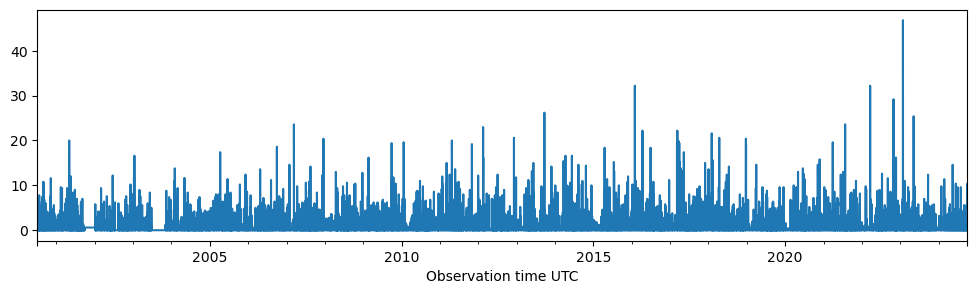

In [148]:
pukekohe['Rainfall [mm]'].plot(figsize=(12,3))

<Axes: xlabel='Observation time UTC'>

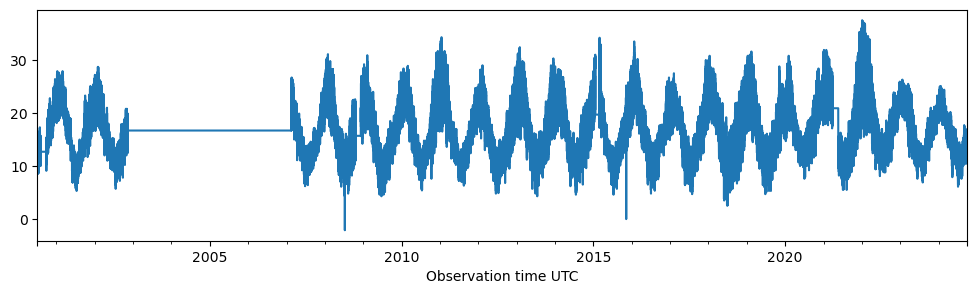

In [149]:
pukekohe['SoilTemp10cm'].plot(figsize=(12,3))

<Axes: xlabel='Observation time UTC'>

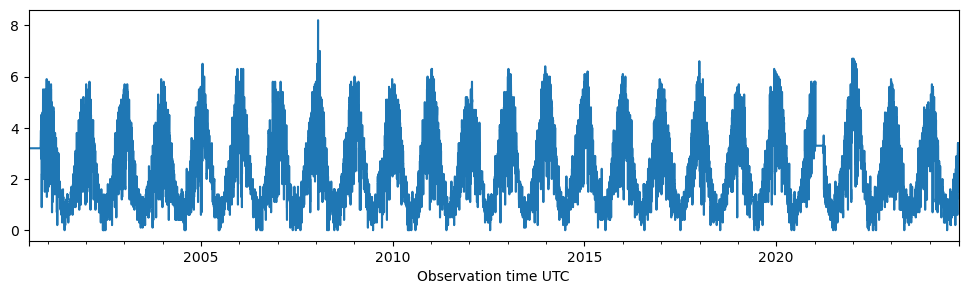

In [150]:
pukekohe['Evaporation [mm]'].plot(figsize=(12,3))


<Axes: xlabel='Observation time UTC'>

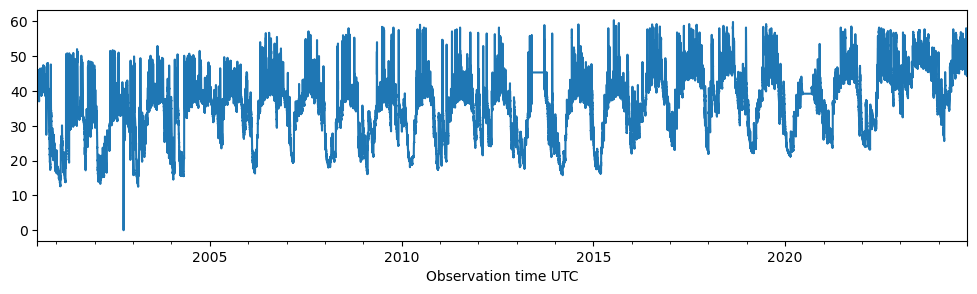

In [151]:
pukekohe['Soil moisture [percent]'].plot(figsize=(12,3))

In [157]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]: 
        return 'Autumn'
    elif month in [6, 7, 8]: 
        return 'Winter'
    else:
        return 'Spring'
    
seasonal_pukekohe = pukekohe.copy()
seasonal_pukekohe.index = pd.to_datetime(seasonal_pukekohe.index, errors='coerce')

# Extract Year, Month, and Season from the index
seasonal_pukekohe['Year'] = seasonal_pukekohe.index.year
seasonal_pukekohe['Month'] = seasonal_pukekohe.index.month
seasonal_pukekohe['Season'] = seasonal_pukekohe['Month'].apply(get_season)

seasonal_pukekohe.head()

,Rainfall [mm],SoilTemp10cm,SoilTemp20cm,SoilTemp50cm,SoilTemp100cm,Evaporation [mm],Soil moisture [percent],Year,Month,Season
Observation time UTC,,,,,,,,,,
2000-07-04 04:00:00+00:00,2.6,14.6,14.6,16.2,20.5,3.2,40.9,2000,7,Winter
2000-07-04 05:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5,2000,7,Winter
2000-07-04 06:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.5,2000,7,Winter
2000-07-04 07:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,44.1,2000,7,Winter
2000-07-04 08:00:00+00:00,0.0,14.6,14.6,16.2,20.5,3.2,43.9,2000,7,Winter


In [159]:

seasonal_means = seasonal_pukekohe.groupby(['Year', 'Season']).agg({
    'Soil moisture [percent]': 'mean',
    'SoilTemp10cm': 'mean', 
    'Rainfall [mm]': 'sum'
}).reset_index()
print(seasonal_means)


    Year  Season  Soil moisture [percent]  SoilTemp10cm  Rainfall [mm]
0   2000  Spring                34.618727     15.707967          297.4
1   2000  Summer                21.079704     21.877957           79.0
2   2000  Winter                41.074292     13.349363          239.2
3   2001  Autumn                25.976812     17.775000          382.0
4   2001  Spring                30.667079     16.565110          957.0
..   ...     ...                      ...           ...            ...
94  2023  Winter                49.966168     11.404121          292.4
95  2024  Autumn                41.397690     16.033016          278.8
96  2024  Spring                47.930980     14.239085          127.0
97  2024  Summer                35.650139     21.289375          102.2
98  2024  Winter                48.525589     11.926313          298.8

[99 rows x 5 columns]


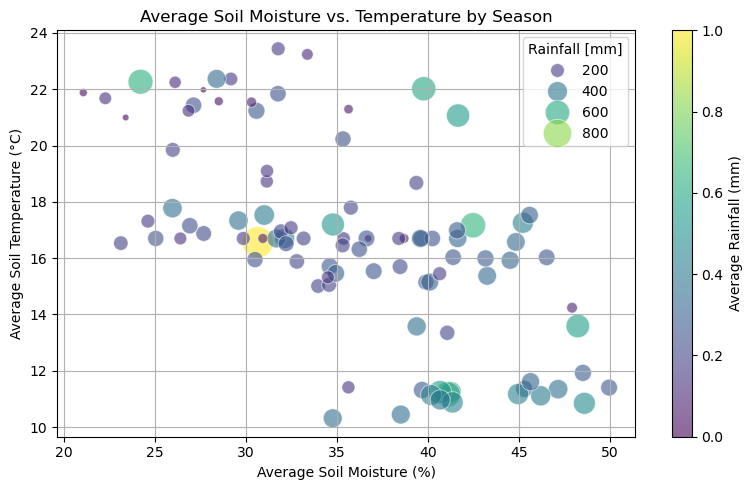

In [162]:
import seaborn as sns

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=seasonal_means,
    x='Soil moisture [percent]',
    y='SoilTemp10cm',
    size='Rainfall [mm]',
    sizes=(20, 500),  # Set the range for the marker sizes
    hue='Rainfall [mm]',  # Color based on rainfall
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)

plt.colorbar(scatter.collections[0], label='Average Rainfall (mm)')

# Set labels and title
plt.xlabel('Average Soil Moisture (%)')
plt.ylabel('Average Soil Temperature (°C)')
plt.title('Average Soil Moisture vs. Temperature by Season')

plt.grid()
plt.tight_layout()
plt.show()

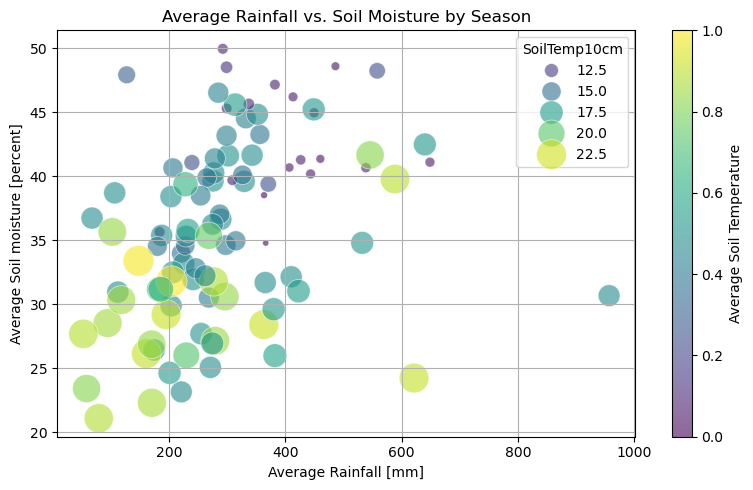

In [168]:
import seaborn as sns

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=seasonal_means,
    x='Rainfall [mm]',
    y='Soil moisture [percent]',
    size='SoilTemp10cm',
    sizes=(20, 500),  # Set the range for the marker sizes
    hue='SoilTemp10cm',  # Color based on rainfall
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)

plt.colorbar(scatter.collections[0], label='Average Soil Temperature')

# Set labels and title
plt.xlabel('Average Rainfall [mm]')
plt.ylabel('Average Soil moisture [percent]')
plt.title('Average Rainfall vs. Soil Moisture by Season')

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
data_to_plot = seasonal_means[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)', 'Year']]


data_to_plot['SoilMoisture(%)'].plot(ax=ax, color='blue', label='Soil Moisture (%)', alpha=0.7)
seasonal_means['SoilTemp(c)'].plot(ax=ax, color='orange', label='Soil Temperature (°C)', alpha=0.7)
seasonal_means['Rain(mm)'].plot(ax=ax, color='green', label='Rainfall (mm)', alpha=0.7)

year_starts = seasonal_means.groupby('Year').head(1).index
years = seasonal_means['Year'].unique()  # Get unique years
ax.set_xticks(year_starts)  # Set x-ticks for each year
ax.set_xticklabels(years, rotation=45)  # Set the year labels

ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')


ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')

ax.legend()

plt.grid()
plt.tight_layout()
plt.show()


Combined data (15-minute intervals) saved successfully.


In [ ]:
# mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
# mtalbert.head()

In [ ]:
# mtalbert['Location'] = 'Central Auckland'
# mtalbert['Land position'] = 'Flat ridge'
# mtalbert['Slope(degree)'] = '0-3'
# mtalbert['Soil Order'] = 'Ultic'
# mtalbert['Soil Types / Series'] = 'Whareora sandy clay loam'
# mtalbert['NZ Soil Classification'] = 'Mottled Yellow Ultic'
# mtalbert['Soil Profile Description'] = '0-10cm dark grey sandy clay loam, structure crumbly when wet, likely to be granular when dry; 10-15cm dark grey sandy clay loam, mixing with yellow brown sandy clay; 15-40 yellow brown sandy clay with grey mottles, structure massive with sticky consistence when wet, likely to be nutty of blocky when dry'
# mtalbert['Pastoral land use'] = 'Mixed dairy and drystock'
# mtalbert.head()
# mtalbert.to_csv('../Data/soil data/mtalbert_soil_data.csv')

Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting